In [19]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score # validating techniques

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

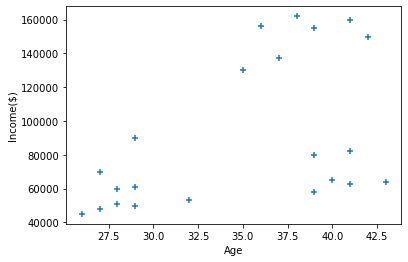

In [5]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df.Age, df['Income($)'], marker="+")
plt.show()

In [6]:
### Feature scaling using Minmaxscaler method
scaler = MinMaxScaler()
df[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])

In [7]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [8]:
### Applying into Clustering method to find pattern
Cluster = KMeans(n_clusters=3)
y_pred = Cluster.fit_predict(df[['Age','Income($)']])

In [9]:
df['Cluster'] = y_pred

In [10]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [11]:
# this cluster is creating group using minimum distance from other cluster
Cluster.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [12]:
df.Cluster.unique()

array([1, 2, 0])

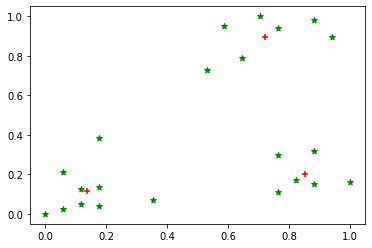

In [13]:
# plot the Cluster centers point in red colors
c0 = df.loc[df['Cluster']==0]
c1 = df.loc[df['Cluster']==1]
c2 = df.loc[df['Cluster']==2]
plt.scatter(c0['Age'], c0['Income($)'], color='green', marker='*')
plt.scatter(c1['Age'], c1['Income($)'], color='green', marker='*')
plt.scatter(c2['Age'], c2['Income($)'], color='green', marker='*')
plt.scatter(Cluster.cluster_centers_[:,0], Cluster.cluster_centers_[:,1], marker='+', color='red')

### Elbow plot

In [14]:
# to find the k value using elbow methods
wss = []
for k in range(1,10+1):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    wss.append(km.inertia_)

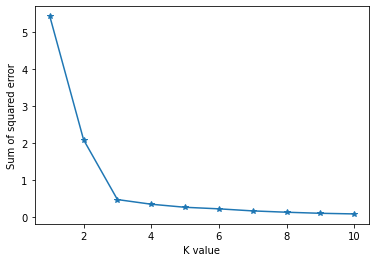

In [15]:
plt.plot(range(1, 10+1), wss, marker="*")
plt.xlabel('K value')
plt.ylabel('Sum of squared error')
plt.show()

In [22]:
X = df.drop(columns='Name')

## Validating techniques for clustering methods

#### Silhouette methods:

For n_clusters = 2 The average silhouette_score is : 0.6570050351730884
For n_clusters = 3 The average silhouette_score is : 0.8440618526317891
For n_clusters = 4 The average silhouette_score is : 0.7105845044171548
For n_clusters = 5 The average silhouette_score is : 0.4574663929276219
For n_clusters = 6 The average silhouette_score is : 0.5049817349828895


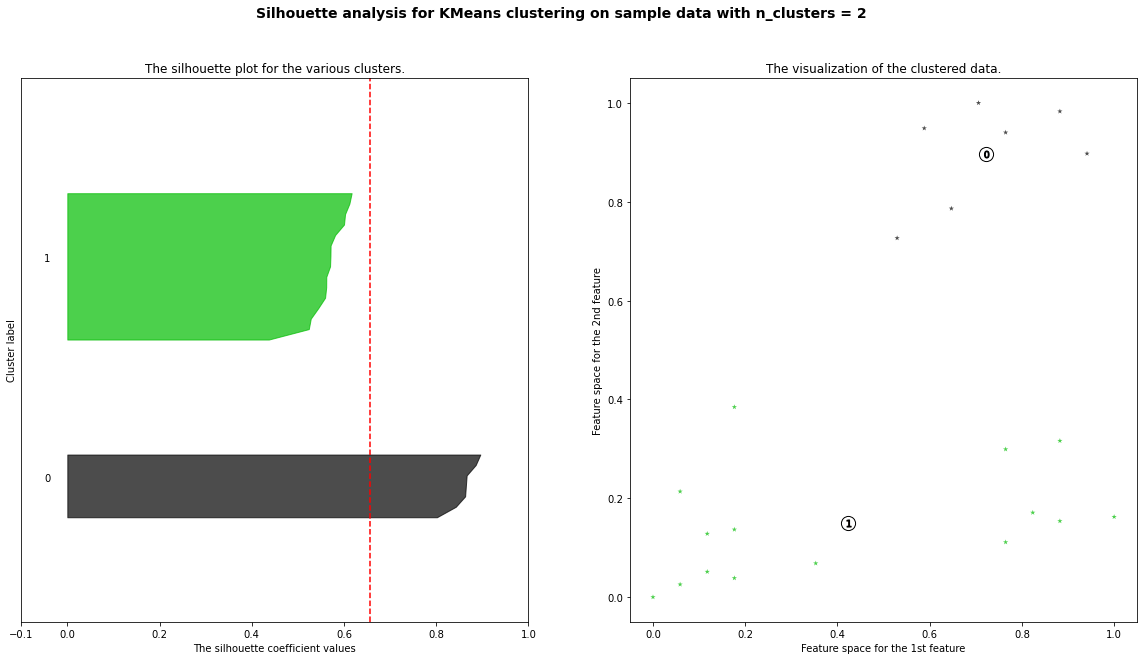

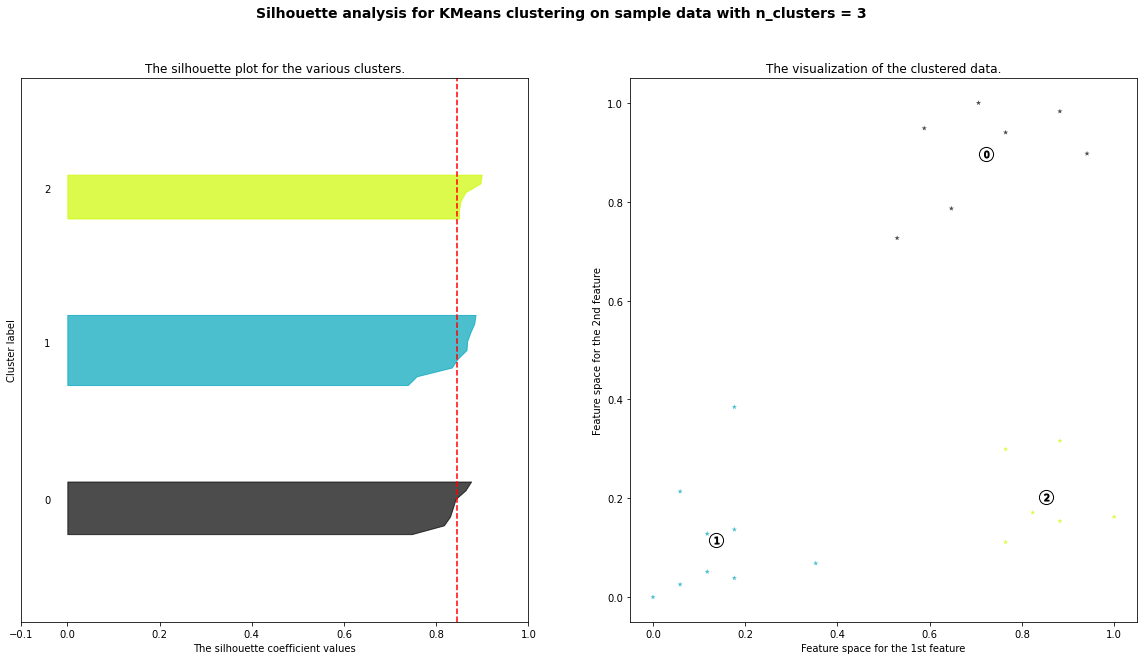

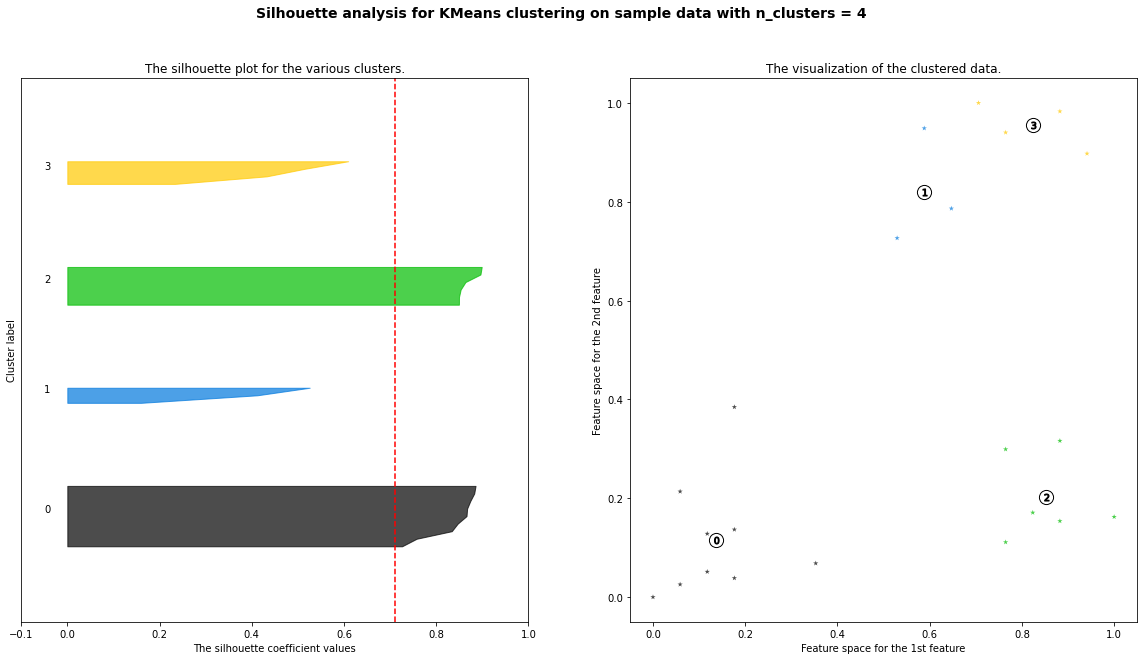

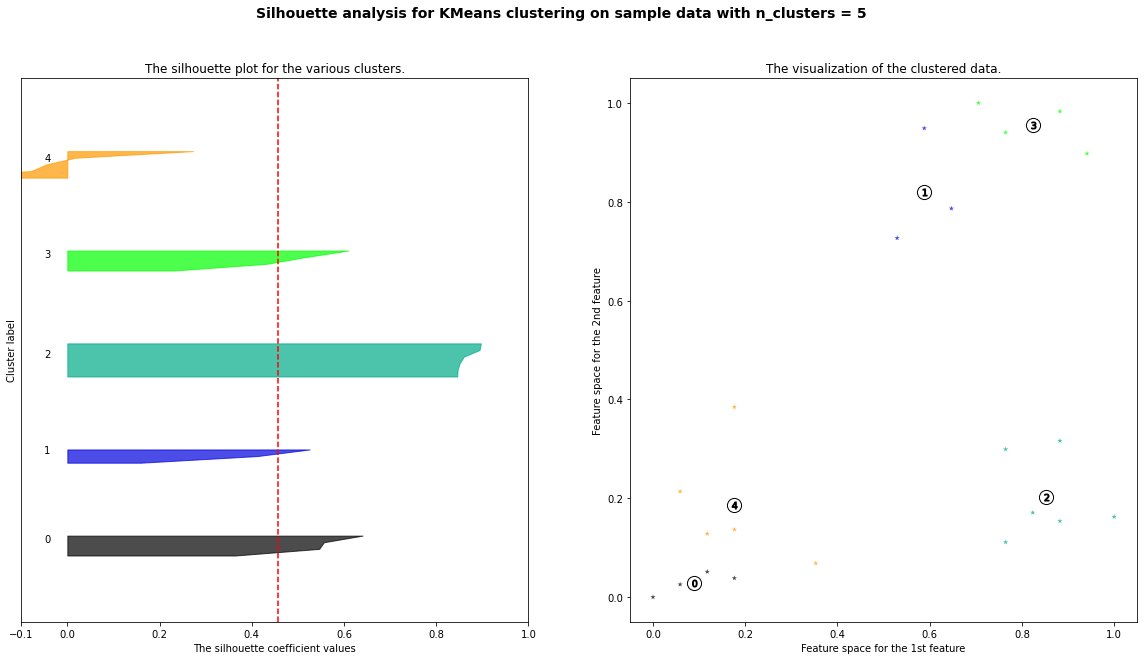

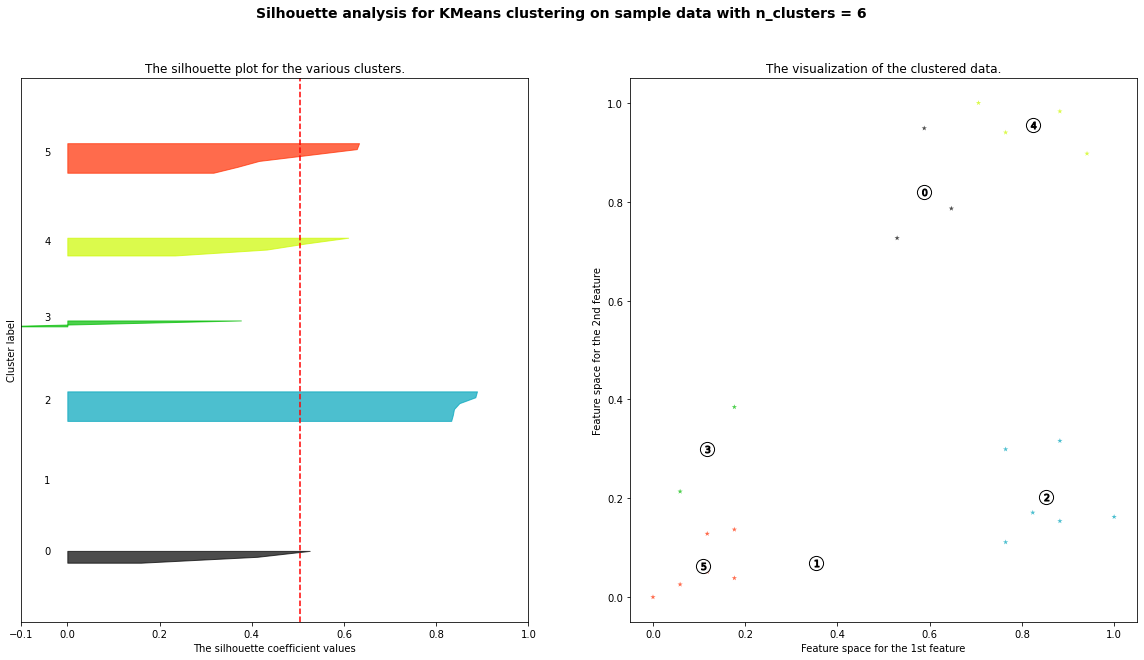

In [33]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['Age'], X['Income($)'], marker='*', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [50]:
### Feature scaling using Minmaxscaler method
scaler = MinMaxScaler()
df[['Age','Income($)']] = scaler.inverse_transform(df[['Age','Income($)']])

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [47]:
df.loc[df['Cluster']==0]

,Name,Age,Income($),Cluster
16,Dipika,0.823529,0.170940,0
17,Priyanka,0.882353,0.153846,0
18,Nick,1.000000,0.162393,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
21,Abdul,0.764706,0.111111,0


In [48]:
df.loc[df['Cluster']==1]

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
11,Tom,0.000000,0.000000,1
12,Arnold,0.058824,0.025641,1
13,Jared,0.117647,0.051282,1
14,Stark,0.176471,0.038462,1
15,Ranbir,0.352941,0.068376,1


In [49]:
df.loc[df['Cluster']==2]

,Name,Age,Income($),Cluster
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2
10,Donald,0.647059,0.786325,2
